In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the mushroom dataset
data=pd.read_csv('mushroom.csv')
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


# EDA

In [3]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data[data.duplicated]

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter


In [7]:
data.info

<bound method DataFrame.info of       Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    pa

In [8]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


In [9]:
data=data.drop('Unnamed: 0',axis=1)
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [10]:
print("Dataset shape:", data.shape)

Dataset shape: (976, 25)


In [11]:
data['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [12]:
data['class'].value_counts()

poisonous    618
edible       358
Name: class, dtype: int64

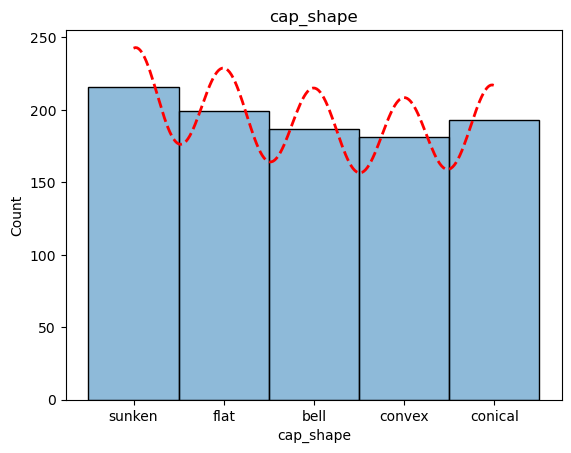

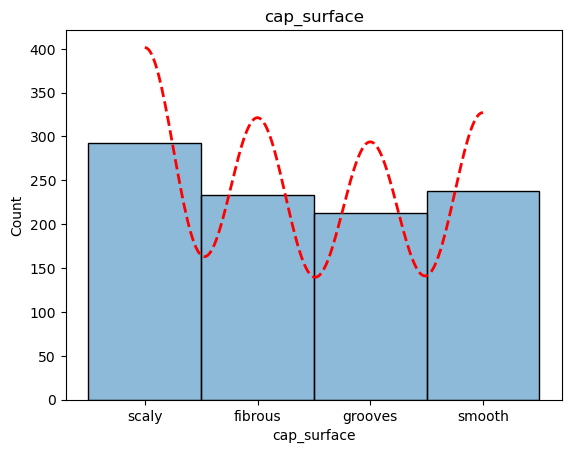

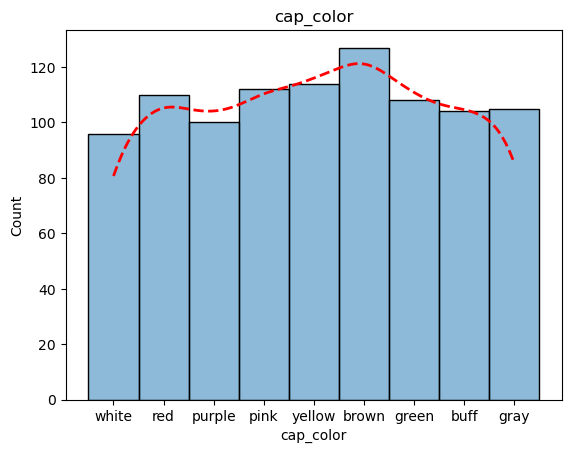

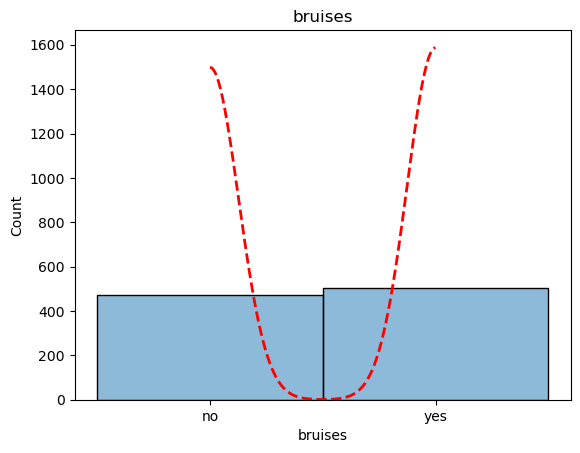

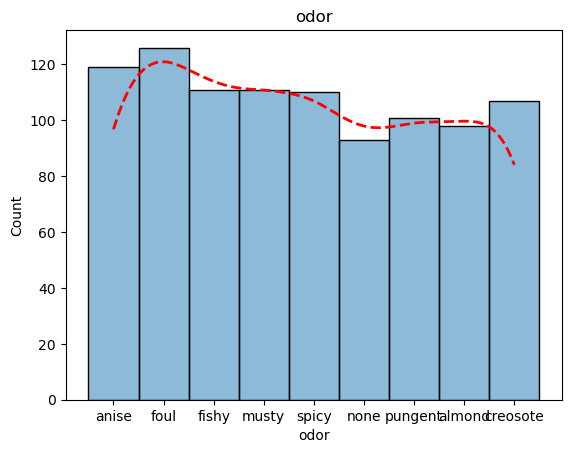

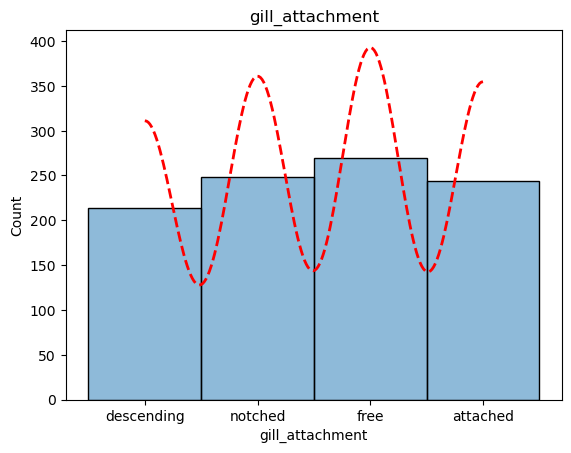

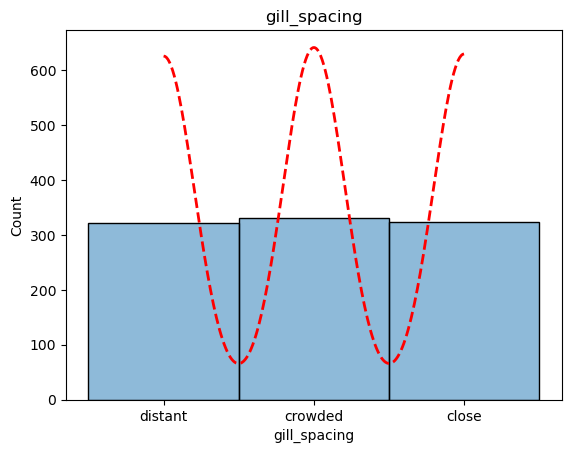

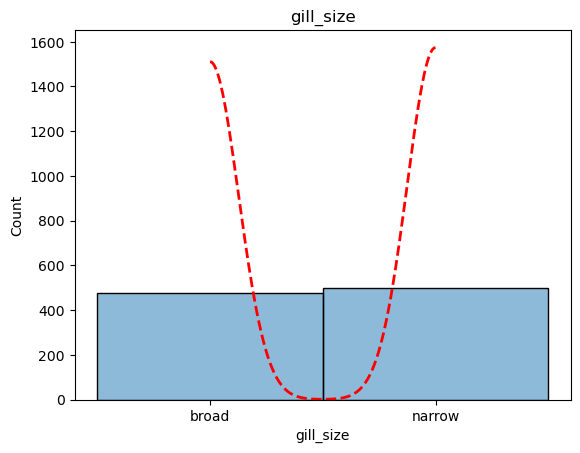

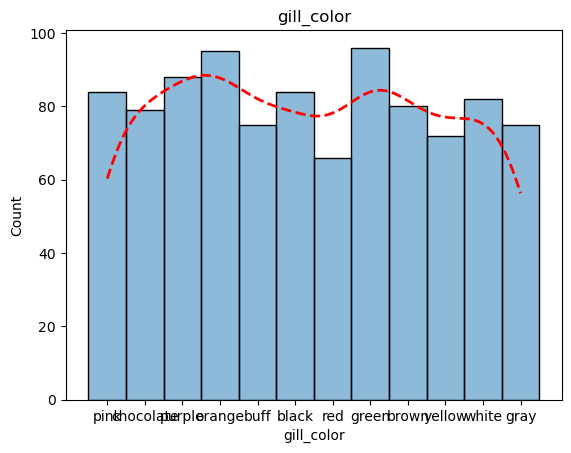

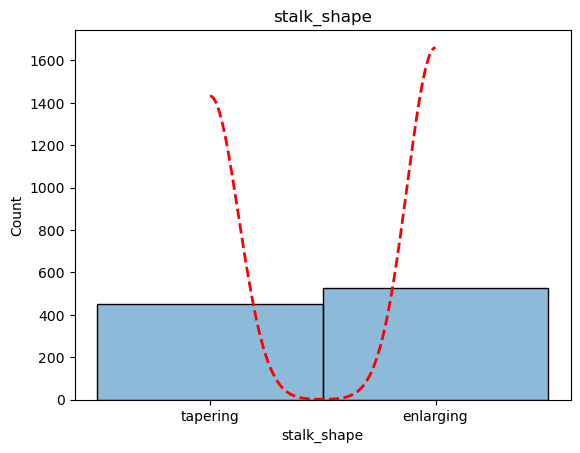

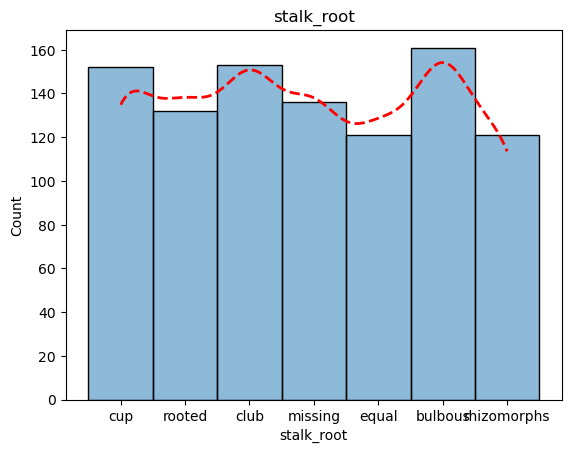

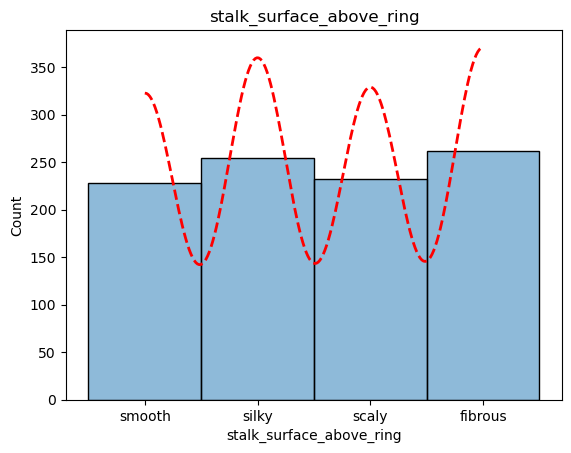

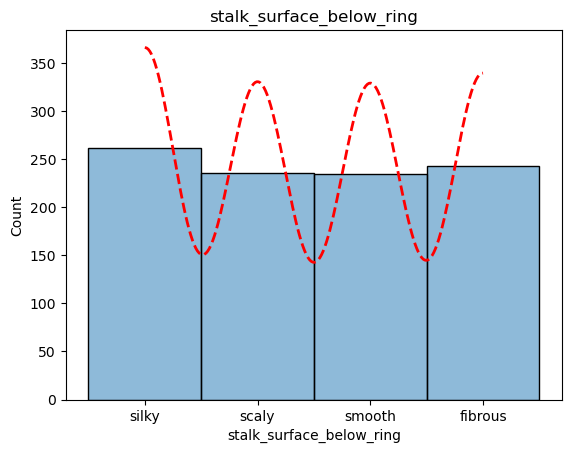

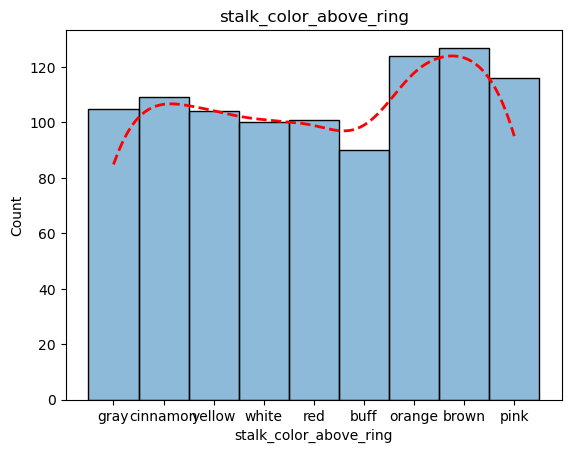

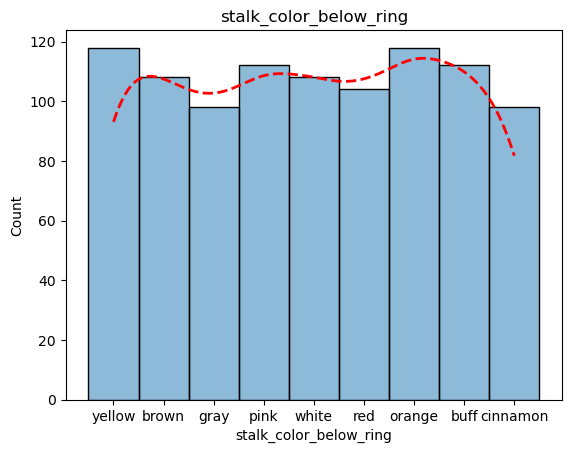

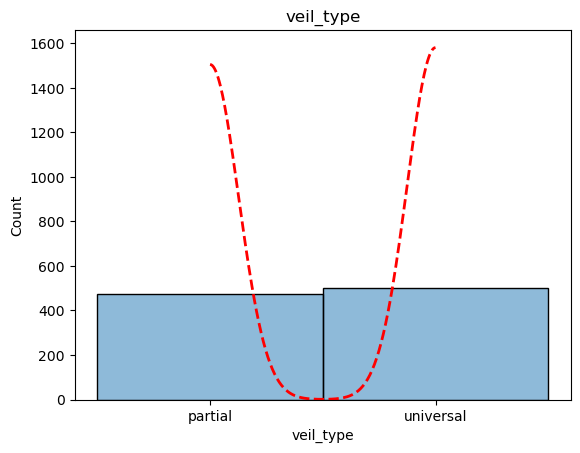

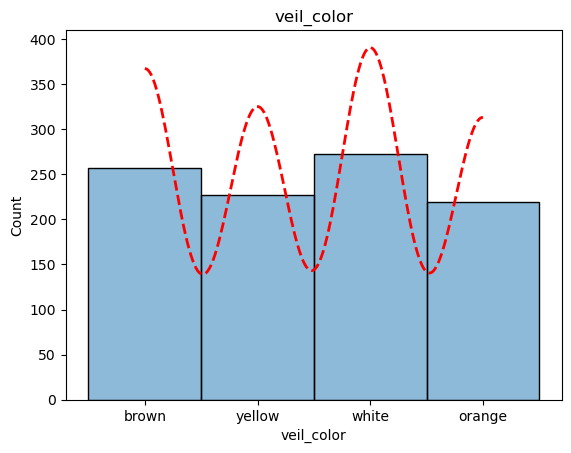

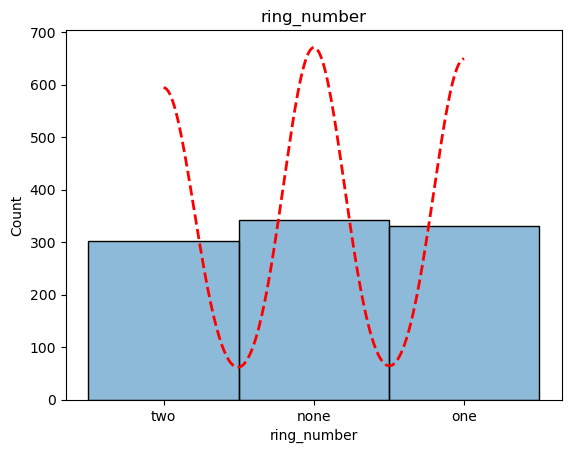

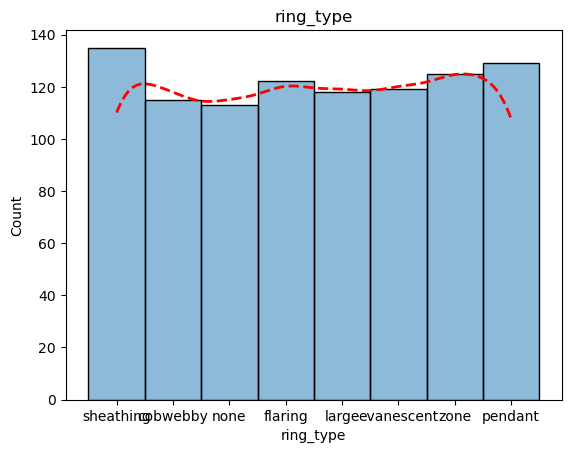

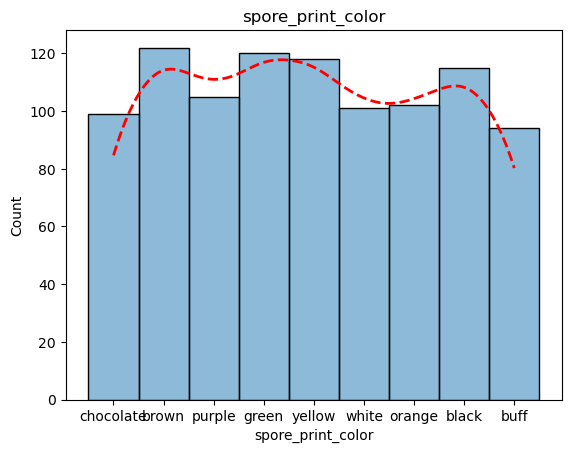

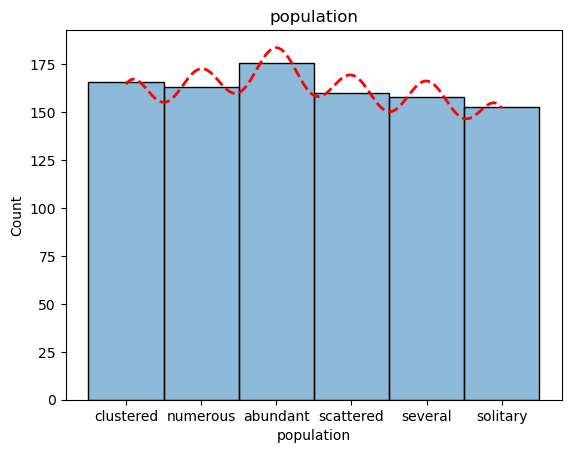

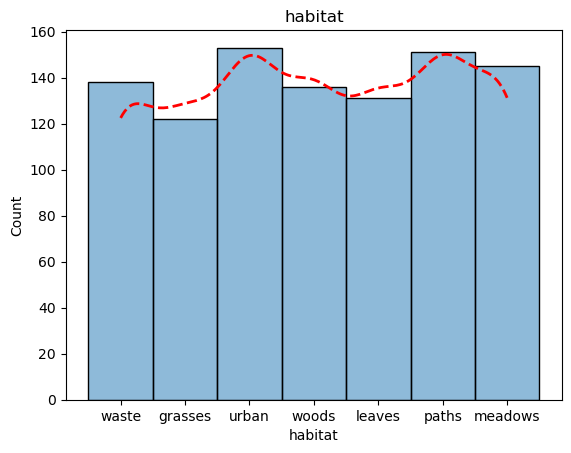

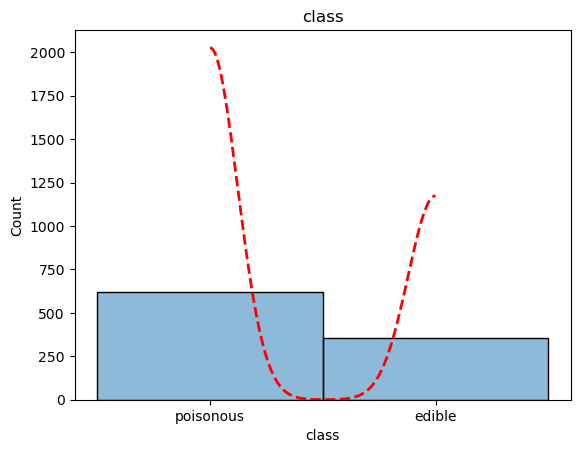

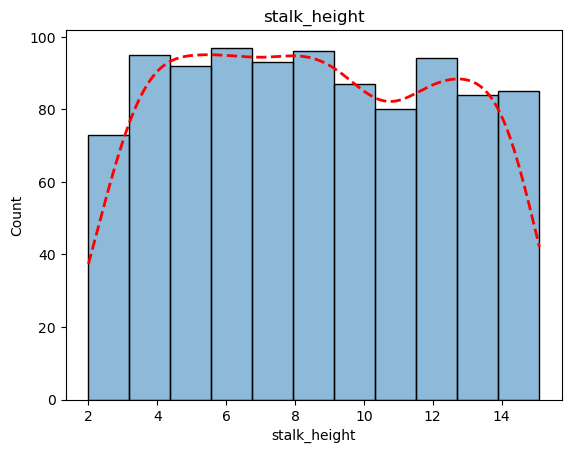

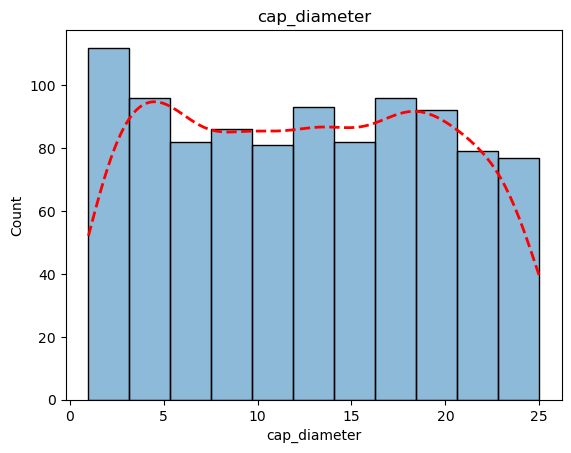

In [13]:
for i in data:
    sns.histplot(data[i], kde = True,
                line_kws = {'linestyle':'dashed',
                         'linewidth':'2'}).lines[0].set_color('red')
    plt.title(i)
    plt.show()


<Axes: >

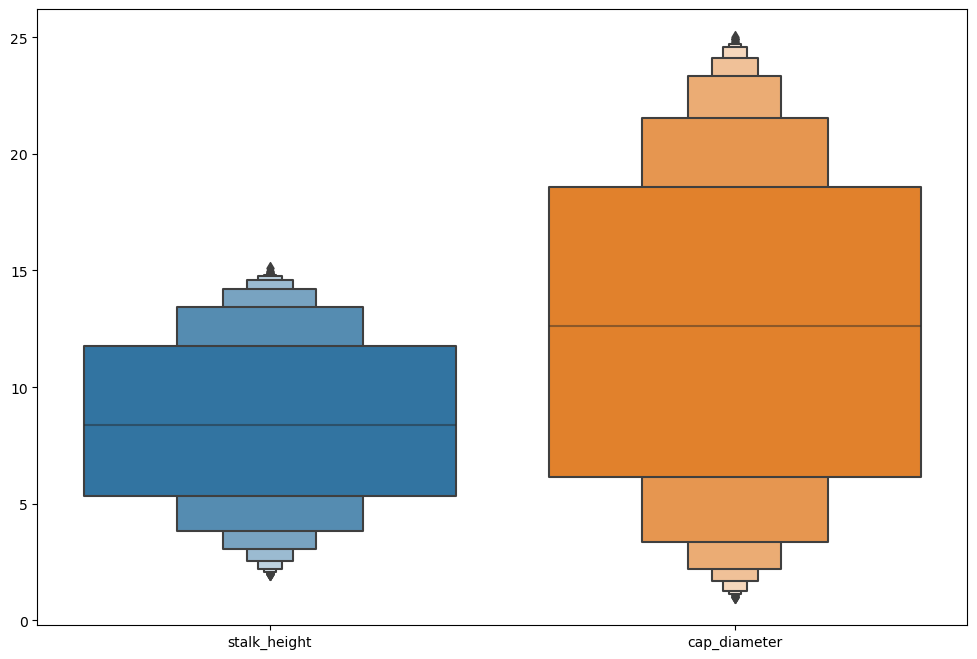

In [14]:
plt.figure(figsize=(12,8))
sns.boxenplot(data)

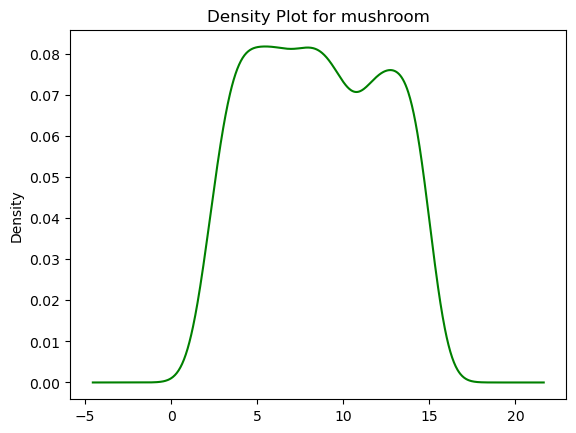

In [15]:
data.stalk_height.plot.density(color="green")
plt.title('Density Plot for mushroom')
plt.show()

In [16]:
data = data.astype('category')
data.dtypes

cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                category
cap_diameter                category
dtype: object

# Data Preprocessing

In [17]:
#converting categorical data into numerical
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [18]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484


In [19]:
data['veil_type']

0       0
1       1
2       1
3       0
4       1
       ..
1985    1
1988    0
1989    1
1996    0
1999    0
Name: veil_type, Length: 976, dtype: int32

In [20]:
features=data.drop(['class'], axis=1)
features

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,8,0,0,2,6,3,1,5,916,190
1,4,0,6,0,1,3,1,1,3,0,...,0,1,0,2,6,1,2,5,128,750
2,3,1,5,1,4,1,1,0,8,1,...,3,1,3,2,6,6,0,5,537,281
3,0,2,4,1,3,3,0,0,6,0,...,5,0,3,2,0,4,1,0,234,829
4,3,3,8,1,5,2,1,1,6,0,...,7,1,2,0,4,8,1,4,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1,1,0,0,4,3,1,0,3,1,...,8,1,0,0,3,1,2,3,819,389
1988,0,1,4,1,1,1,2,0,1,0,...,5,0,0,2,5,8,2,0,112,743
1989,4,3,5,1,1,1,1,1,2,1,...,6,1,1,2,4,5,0,0,830,610
1996,4,2,5,1,5,0,2,1,9,1,...,4,0,2,1,7,8,2,5,335,521


In [21]:
target=data[['class']]
target

,class
0,1
1,0
2,1
3,1
4,1
...,...
1985,0
1988,1
1989,0
1996,1


# Data Visualizations

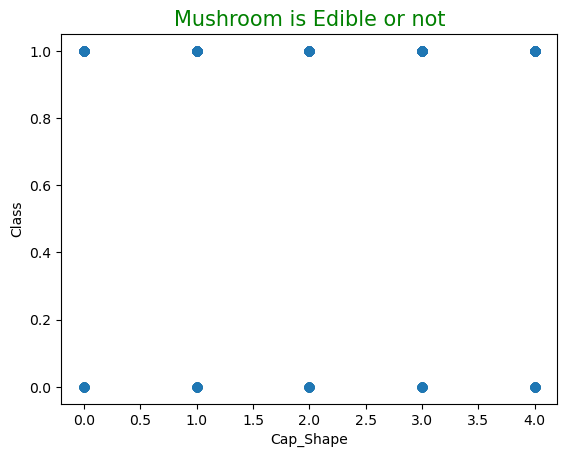

In [22]:
#scatter plot
plt.scatter(x=data['cap_shape'],y=data['class'])
plt.title('Mushroom is Edible or not',color="green",size=15)
plt.xlabel('Cap_Shape')
plt.ylabel('Class')
plt.show()

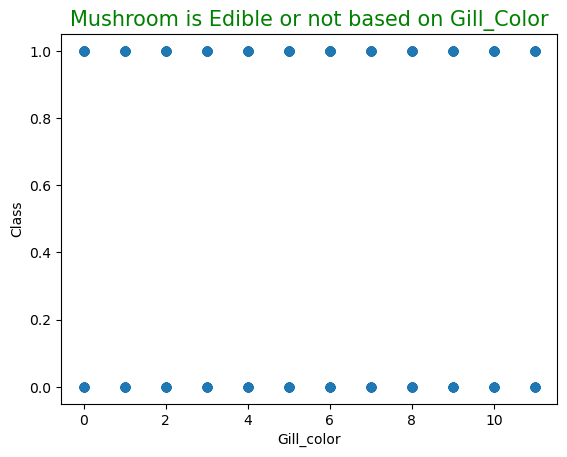

In [23]:
plt.scatter(x=data['gill_color'],y=data['class'])
plt.title('Mushroom is Edible or not based on Gill_Color',color="green",size=15)
plt.xlabel('Gill_color')
plt.ylabel('Class')
plt.show()

In [24]:
df=data.corr()
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
cap_shape,1.000000,0.024645,0.020694,-0.007043,-0.035072,0.017091,-0.026279,0.017675,0.050239,-0.013837,...,-0.015447,-0.004381,0.038398,0.012335,0.008641,0.009890,-0.003017,0.008132,-0.020207,0.016437
cap_surface,0.024645,1.000000,0.010129,-0.013355,-0.001229,-0.008412,0.033273,-0.046493,0.033423,-0.012625,...,-0.042954,0.027026,0.005017,0.002838,-0.057301,-0.026943,-0.038786,-0.047799,0.025817,0.030744
cap_color,0.020694,0.010129,1.000000,0.007862,-0.056524,0.000201,0.001367,0.034965,0.005884,-0.015452,...,-0.008664,-0.027817,0.037536,0.023527,0.045805,-0.039548,-0.006857,-0.048735,0.026889,0.006585
bruises,-0.007043,-0.013355,0.007862,1.000000,0.051111,0.006422,-0.017566,-0.004689,-0.033166,0.035013,...,0.007497,-0.023444,-0.037722,-0.067596,-0.028591,0.014990,0.011681,-0.007932,0.068623,-0.048393
odor,-0.035072,-0.001229,-0.056524,0.051111,1.000000,-0.013212,-0.030698,-0.057671,-0.030782,-0.003433,...,0.022875,0.033718,-0.031397,0.005064,-0.078276,-0.000816,-0.021675,0.009625,-0.001618,-0.044851
gill_attachment,0.017091,-0.008412,0.000201,0.006422,-0.013212,1.000000,-0.024634,-0.011606,0.026293,-0.021527,...,-0.044643,-0.005227,0.048239,-0.049124,-0.020564,0.003722,-0.020783,-0.023758,-0.001652,-0.013763
gill_spacing,-0.026279,0.033273,0.001367,-0.017566,-0.030698,-0.024634,1.000000,0.012648,-0.004135,0.060430,...,-0.027653,-0.003433,0.009182,0.008323,0.023472,0.005042,0.024691,0.045121,0.004417,0.035384
gill_size,0.017675,-0.046493,0.034965,-0.004689,-0.057671,-0.011606,0.012648,1.000000,-0.022993,-0.035478,...,-0.041509,-0.005179,-0.022972,0.005937,0.033767,0.002667,0.014063,0.019853,-0.015714,-0.029273
gill_color,0.050239,0.033423,0.005884,-0.033166,-0.030782,0.026293,-0.004135,-0.022993,1.000000,-0.040358,...,-0.024141,-0.011001,-0.021489,0.019591,0.005718,0.024611,0.014710,-0.000277,0.025191,-0.007877
stalk_shape,-0.013837,-0.012625,-0.015452,0.035013,-0.003433,-0.021527,0.060430,-0.035478,-0.040358,1.000000,...,0.018263,-0.032575,0.007748,0.023776,0.033676,-0.013345,-0.053501,0.028972,0.030575,-0.009138


<Axes: >

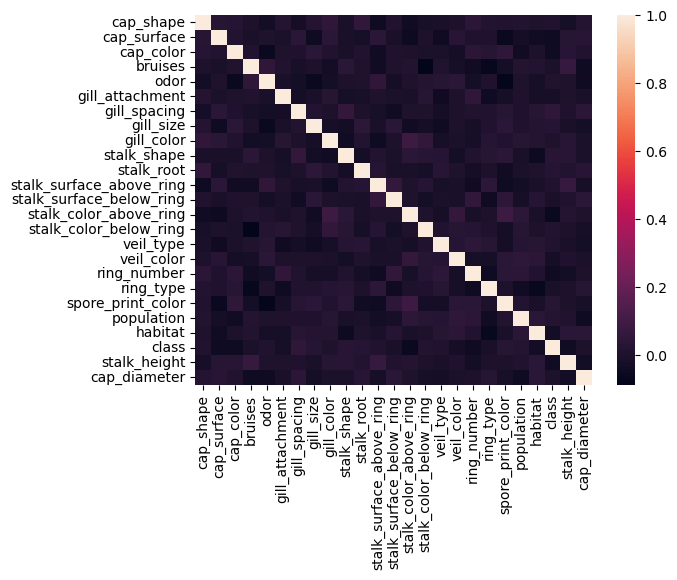

In [25]:
sns.heatmap(df)

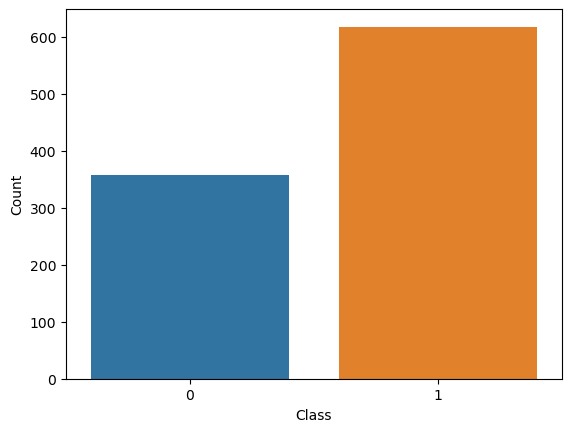

 0.008132    1
-0.055832    1
-0.037819    1
 1.000000    1
-0.035553    1
 0.014848    1
 0.023852    1
-0.012554    1
-0.042694    1
-0.025955    1
 0.005962    1
 0.012096    1
-0.014635    1
-0.047799    1
 0.006322    1
 0.019703    1
 0.028972    1
-0.000277    1
 0.019853    1
 0.045121    1
-0.023758    1
 0.009625    1
-0.007932    1
-0.048735    1
-0.006105    1
Name: class, dtype: int64

In [26]:
sns.countplot(x='class',data=data)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
df.loc[:,'class'].value_counts()

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


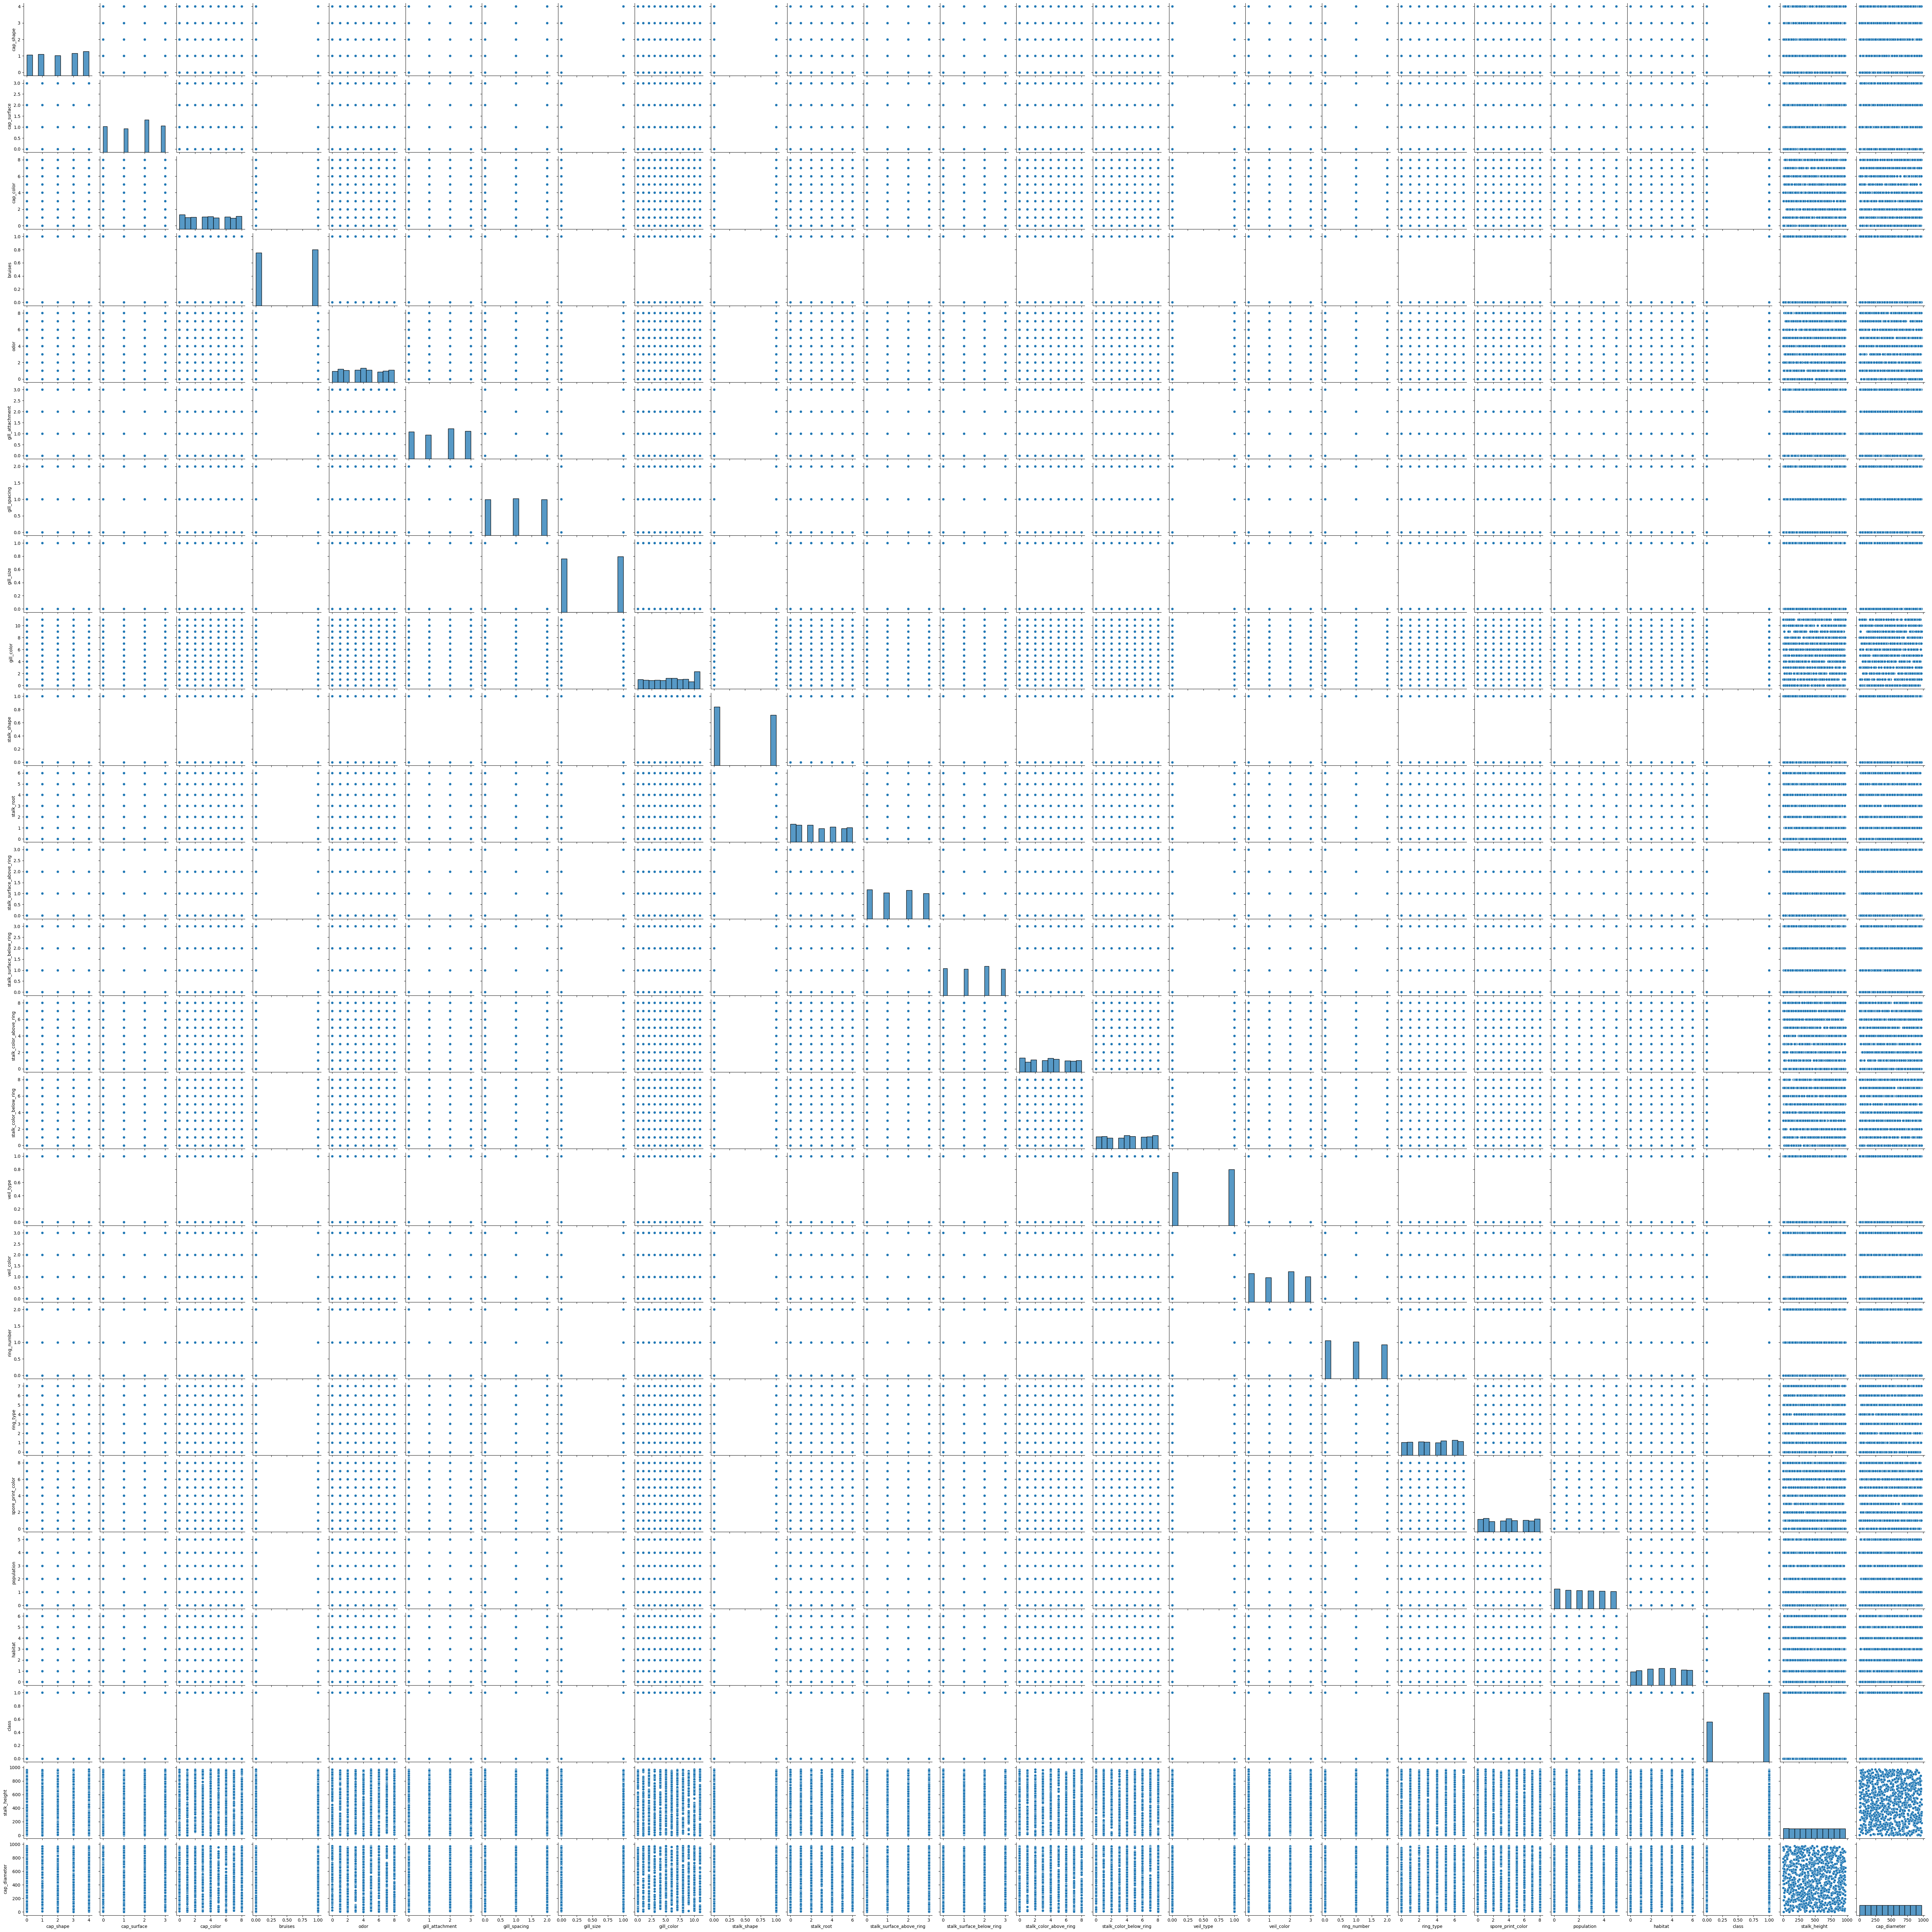

In [27]:
sns.pairplot(data)

# SVM Implementation

In [28]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(732, 24)
(244, 24)
(732, 1)
(244, 1)


In [30]:
svc=SVC(C=1,kernel='rbf',gamma=0.1)
svc

SVC(C=1, gamma=0.1)

In [31]:
svc.fit(x_train,y_train)

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.1)

In [32]:
y_pred=svc.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.5901639344262295

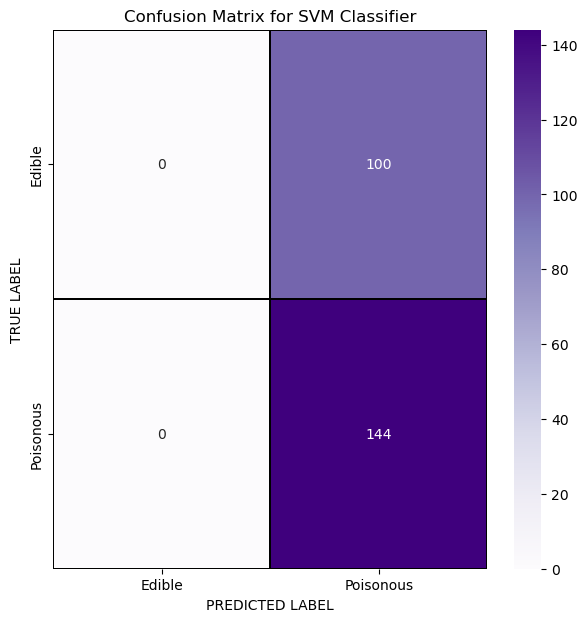

In [34]:
cm=confusion_matrix(y_test,y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
params={'C':[1,2,3,4,5,6,10,12],'kernel':['linear','poly','rbf','sigmoid'],'gamma':[0.1,0.2,0.3,0.4]}

In [37]:
grid_search=GridSearchCV(svc,params,verbose=2)

In [38]:
preds = svc.predict(x_test)
print(preds[:36])
print(y_test[:36].values)
# 0 - Edible
# 1 - Poisonous


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Parameter Tuning and Optimization

In [39]:
svc1=SVC(C=1,kernel='linear',gamma=0.1)
svc1

SVC(C=1, gamma=0.1, kernel='linear')

In [40]:
svc1.fit(x_train,y_train)

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.1, kernel='linear')

In [41]:
y_pred=svc1.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.5901639344262295

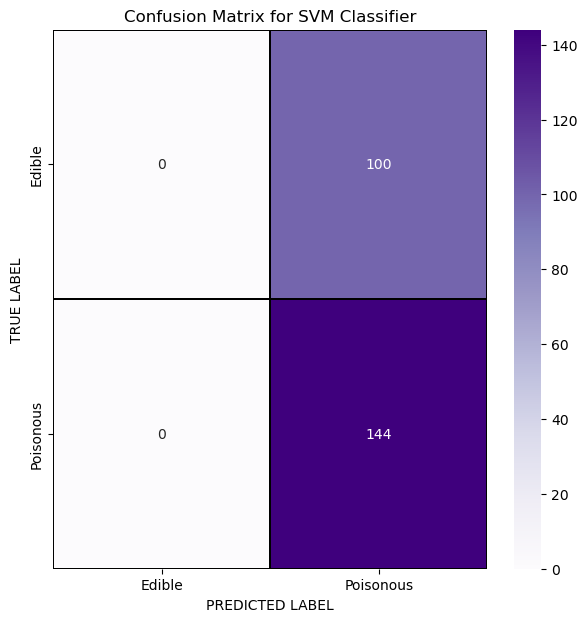

In [43]:
cm=confusion_matrix(y_test,y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()


In [44]:
#sigmoid parameter

In [52]:
svc=SVC(C=1,kernel='sigmoid',gamma=0.2)
svc

SVC(C=1, gamma=0.2, kernel='sigmoid')

In [53]:
svc.fit(x_train,y_train)

C:\Users\Navya Sri Palakuru\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.2, kernel='sigmoid')

In [54]:
p_pred=svc.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.5901639344262295

In [56]:
confusion_matrix(y_test,y_pred)

array([[  0, 100],
       [  0, 144]], dtype=int64)